Data Preperation

In [1]:
import pandas as pd
import numpy as np
from itertools import chain
from sklearn.decomposition import PCA

## Class Definition

(please see https://github.com/chenson2018/Humana-Mays-Competition/blob/master/Final%20Model/humana_class.py if you would like to view how features were extracted)

In [2]:
from humana_class import DataPrep

## Read in training/holdout and extract features

In [3]:
training = pd.read_csv('HMAHCC_COMP.csv')
test = pd.read_csv('HMAHCC_HOLDOUT.csv')

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# training = training.iloc[:20000]
# test = test.iloc[:20000]

In [5]:
training_class = DataPrep(training)
test_class = DataPrep(test)

In [6]:
%%time
training_class.get_features(derive_response=True)
test_class.get_features()

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\chenson\Documents\GitHub\Humana-Mays-Competition\Final Model\humana_class.py:262: RuntimeWarning: All-NaN slice encountered
  maxMME = np.nanmax(prior_day0['MME'].values)
C:\Users\chenson\Documents\GitHub\Humana-Mays-Competition\Final Model\humana_class.py:263: RuntimeWarning: Mean of empty slice
  avgMME = np.nanmean(prior_day0['MME'].values)
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Wall time: 14min 21s


In [7]:
training_features = training_class.feature_frame
training_features

,LTOT,MME_on_day0,SUPPLY_CNT_on_day0,PAYABLE_QTY_on_day0,max_MME_prior,avg_MME_prior,total_SUPPLY_CNT_prior,total_PAYABLE_QTY_prior,opioid_cost_on_day_0,opioid_net_payment_on_day_0,...,generic_pc0,generic_pc1,generic_pc2,generic_pc3,generic_pc4,generic_pc5,generic_pc6,generic_pc7,generic_pc8,generic_pc9
ID10010854159,False,15.000000,5.0,15.0,0.000000,0.000000,0.0,0.000000,1.83,1.38,...,-5.827083,-1.440194,-2.612607,-1.891909,-0.929671,-0.359510,-0.474685,-1.747752,-0.471181,-0.390158
ID10013863216,True,10.000000,90.0,180.0,0.000000,0.000000,0.0,0.000000,11.05,0.00,...,78.911681,0.921673,1.581688,1.100533,0.430629,0.207605,0.223252,0.929939,0.234207,0.205003
ID10024447278,True,50.000000,3.0,20.0,22.500000,20.000000,15.0,40.000000,5.00,2.99,...,-10.858223,-1.648665,-3.029095,-2.332854,-1.340008,-0.729227,-1.924404,0.671163,-0.374990,-0.352468
ID1002482139,True,60.000000,30.0,120.0,90.000000,37.254464,789.0,2895.000000,23.72,22.52,...,-10.945533,-1.754316,-3.247826,-2.562327,-1.426616,-0.615339,-0.887676,-3.176651,-2.343637,29.254993
ID1003386406,False,20.000000,15.0,60.0,50.000000,50.000000,3.0,20.000000,7.60,7.60,...,4.142184,-1.162327,-2.119161,-1.539857,-0.769636,-0.292790,-0.392575,-1.432729,-0.388194,-0.320139
ID10036289882,False,37.500000,2.0,15.0,0.000000,0.000000,0.0,0.000000,4.45,1.33,...,-10.921630,0.197789,-2.020023,-1.790856,-0.906053,-0.355247,-0.467977,-1.738096,-0.472531,-0.392941
ID10036954381,False,37.500000,2.0,15.0,37.500000,37.500000,2.0,15.000000,5.50,0.00,...,-10.921630,0.197789,-2.020023,-1.790856,-0.906053,-0.355247,-0.467977,-1.738096,-0.472531,-0.392941
ID10055739763,True,15.000000,5.0,15.0,30.000000,30.000000,3.0,12.000000,2.95,0.00,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412317,-0.344600
ID10074598346,False,20.000000,5.0,20.0,40.000000,25.842105,452.0,1480.000000,3.60,3.05,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412317,-0.344600
ID10081072715,False,20.000000,5.0,20.0,0.000000,0.000000,0.0,0.000000,5.60,5.15,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412317,-0.344600


In [8]:
test_features = test_class.feature_frame
test_features

,MME_on_day0,SUPPLY_CNT_on_day0,PAYABLE_QTY_on_day0,max_MME_prior,avg_MME_prior,total_SUPPLY_CNT_prior,total_PAYABLE_QTY_prior,opioid_cost_on_day_0,opioid_net_payment_on_day_0,supply_times,...,generic_pc0,generic_pc1,generic_pc2,generic_pc3,generic_pc4,generic_pc5,generic_pc6,generic_pc7,generic_pc8,generic_pc9
ID40721836565,22.500000,90.0,270.0,22.500000,21.041667,360.0,1010.000000,55.10,0.00,5,...,-14.161341,-5.919989,-23.061845,-57.546630,60.447996,3.110726,8.679308,12.914450,0.669107,0.316387
ID98975196852,16.666667,3.0,10.0,45.000000,45.000000,5.0,30.000000,7.15,3.16,2,...,-11.660490,-2.462648,-0.374807,0.371098,-1.802911,-0.293950,-1.037730,-2.021928,-0.180468,-0.274416
ID99208242445,64.285714,7.0,60.0,37.500000,37.500000,2.0,15.000000,12.50,1.58,2,...,-11.640511,-1.452008,-3.637015,0.737652,-3.876395,-2.080125,4.596351,0.605101,-0.119036,-0.242862
ID49984943936,16.666667,3.0,10.0,0.000000,0.000000,0.0,0.000000,2.30,0.00,1,...,-11.660490,-2.462648,-0.374807,0.371098,-1.802911,-0.293950,-1.037730,-2.021928,-0.180468,-0.274416
ID11087903013,15.000000,10.0,30.0,0.000000,0.000000,0.0,0.000000,2.63,0.00,1,...,-1.540259,-1.054328,-2.513397,0.412429,-1.926903,-0.296633,-1.035260,-1.985652,-0.198798,-0.234058
ID70649720202,10.000000,90.0,180.0,20.000000,11.020408,468.0,936.000000,12.99,12.99,8,...,78.169098,0.758896,1.710569,-0.238725,1.173024,0.182324,0.608399,1.167892,-0.136182,0.120431
ID97618182095,30.000000,15.0,60.0,67.500000,38.509615,49.0,976.960804,13.10,0.00,5,...,-11.946830,-2.054149,-6.378134,-9.179586,8.146004,0.221369,0.412621,0.169204,-0.060669,-0.179243
ID77178525448,20.000000,3.0,12.0,25.000000,25.000000,4.0,20.000000,6.50,6.17,2,...,-8.514827,-1.212985,-2.882994,0.469405,-2.198147,-0.338541,-1.179080,-2.261587,-0.204277,-0.265076
ID76985382883,21.428571,7.0,30.0,0.000000,0.000000,0.0,0.000000,6.50,5.31,1,...,-11.869239,-4.038204,3.180641,0.207465,-1.120935,-0.210548,-0.767081,-1.544706,-0.145592,-0.269144
ID59418996264,30.000000,10.0,60.0,0.000000,0.000000,0.0,0.000000,5.50,2.20,1,...,-1.540259,-1.054328,-2.513397,0.412429,-1.926903,-0.296633,-1.035260,-1.985652,-0.198798,-0.234058


## Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [10]:
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [84]:
class Model:
    def __init__(self, train_set, test_set):
        self.train_set = train_set
        self.test_set = test_set
        
        X = train_set.iloc[:,1:]
        y = train_set.iloc[:,0].map(lambda x: 1 if x == True else 0 )
        
        self.X = X
        self.y = y
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.33, random_state=33)
        
        
    def Random_Forest(self):
        rf_model = RandomForestClassifier(n_estimators=300, 
                                  max_depth=9,
                                  random_state=100)
        
        cv_results = cross_validate(rf_model, self.X_train, self.y_train, cv=3,
                            scoring= 'roc_auc',
                            return_train_score=True,
                            return_estimator =True)
        
        rf_model.fit(self.X_train, self.y_train)
        
        return rf_model.predict_proba(self.test_set)[:,1]
    
    def LGB(self):
        bst = lgb.LGBMClassifier(boosting_type= 'gbdt',
                        objective = 'binary',
                        max_depth = 3,
                        n_estimators = 1000)

        bst.fit(self.X_train.values, self.y_train.values)
        
        return bst.predict_proba(self.test_set)[:,1]
    
    def Neural_Net(self):
        scaler = MinMaxScaler()
        scaler.fit(self.X)
        
        X_scale = scaler.transform(self.X)
        y_array = self.y.values
        
        X_train, X_test_s, y_train, y_test = train_test_split(X_scale, y_array, test_size=0.33, random_state=33)
        X_train_mlp, X_validation, y_train_mlp, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=33)
        
        model = Sequential()

        #First Hidden Layer
        model.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))

        #Second  Hidden Layer
        model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))

        #Output Layer
        model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        # add early stop to prevent overfitting
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)
        mc = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

        history = model.fit(X_train, y_train,
                            validation_split = 0.15,
                            epochs=4000, verbose=0, callbacks=[es, mc])

        saved_model = load_model('best_model2.h5')
        
        #scale test data
        scaler.fit(self.test_set)
        X_test_scale = scaler.transform(self.test_set)
        
        NN_predict = saved_model.predict_proba(X_test_scale)
        nn_prob = np.array([ x[0] for x in NN_predict])
        
        return nn_prob
    
    def predict(self):
        rf_predictions = self.Random_Forest()
        lgb_predictions = self.LGB()
        nn_predictions = self.Neural_Net()
        
        self.predictions = pd.DataFrame({'LGB':lgb_predictions,
                                         'Random Forest':rf_predictions,
                                         'Neural Net':nn_predictions
                                          }, 
                                          index = self.test_set.index)

        self.predictions['Model Average'] = self.predictions.mean(axis = 1)
        
        return self.predictions

In [12]:
model = Model(train_set=training_features, test_set=test_features)
predictions = model.predict()

In [13]:
predictions

,LGB,Random Forest,Neural Net,Model Average
ID40721836565,0.994878,0.935385,0.943377,0.957880
ID98975196852,0.034952,0.213690,0.228297,0.158980
ID99208242445,0.292726,0.281212,0.180969,0.251636
ID49984943936,0.102549,0.181040,0.132389,0.138659
ID11087903013,0.247035,0.317967,0.246902,0.270635
ID70649720202,0.896873,0.875723,0.914339,0.895645
ID97618182095,0.145587,0.469103,0.598345,0.404345
ID77178525448,0.186736,0.212877,0.252697,0.217437
ID76985382883,0.124136,0.211416,0.234237,0.189930
ID59418996264,0.115108,0.203948,0.179421,0.166159


In [14]:
%matplotlib inline
import matplotlib.pylab as plt

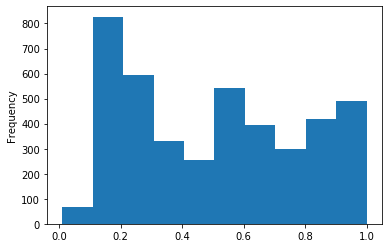

In [15]:
predictions['Neural Net'].plot(kind = 'hist')

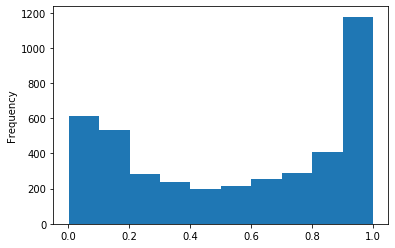

In [16]:
predictions['LGB'].plot(kind = 'hist')

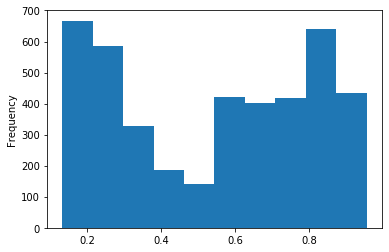

In [17]:
predictions['Random Forest'].plot(kind = 'hist')

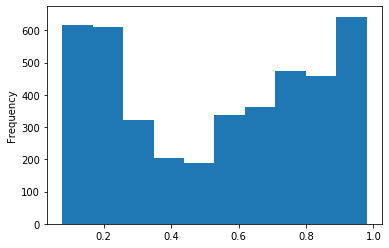

In [18]:
predictions['Model Average'].plot(kind = 'hist')

In [19]:
(predictions['LGB'] - predictions['Random Forest']).abs().mean()

0.12242888596424625

In [20]:
(predictions['LGB'] - predictions['Neural Net']).abs().mean()

0.1275849125528425

In [21]:
(predictions['Random Forest'] - predictions['Neural Net']).abs().mean()

0.07388447974312287

## Let's try a validation set to get a feel for model accuracy:

In [190]:
training_features

,LTOT,MME_on_day0,SUPPLY_CNT_on_day0,PAYABLE_QTY_on_day0,max_MME_prior,avg_MME_prior,total_SUPPLY_CNT_prior,total_PAYABLE_QTY_prior,opioid_cost_on_day_0,opioid_net_payment_on_day_0,...,generic_pc0,generic_pc1,generic_pc2,generic_pc3,generic_pc4,generic_pc5,generic_pc6,generic_pc7,generic_pc8,generic_pc9
ID10010854159,False,15.000000,5.0,15.0,0.000000,0.000000,0.0,0.000000,1.83,1.38,...,-5.827083,-1.440194,-2.612607,-1.891909,-0.929671,-0.359510,-0.474685,-1.747752,-0.471181,-0.390158
ID10013863216,True,10.000000,90.0,180.0,0.000000,0.000000,0.0,0.000000,11.05,0.00,...,78.911681,0.921673,1.581688,1.100533,0.430629,0.207605,0.223252,0.929939,0.234207,0.205003
ID10024447278,True,50.000000,3.0,20.0,22.500000,20.000000,15.0,40.000000,5.00,2.99,...,-10.858223,-1.648665,-3.029095,-2.332854,-1.340008,-0.729227,-1.924404,0.671163,-0.374990,-0.352468
ID1002482139,True,60.000000,30.0,120.0,90.000000,37.254464,789.0,2895.000000,23.72,22.52,...,-10.945533,-1.754316,-3.247826,-2.562327,-1.426616,-0.615339,-0.887676,-3.176651,-2.343637,29.254993
ID1003386406,False,20.000000,15.0,60.0,50.000000,50.000000,3.0,20.000000,7.60,7.60,...,4.142184,-1.162327,-2.119161,-1.539857,-0.769636,-0.292790,-0.392575,-1.432729,-0.388194,-0.320139
ID10036289882,False,37.500000,2.0,15.0,0.000000,0.000000,0.0,0.000000,4.45,1.33,...,-10.921630,0.197789,-2.020023,-1.790856,-0.906053,-0.355247,-0.467977,-1.738096,-0.472531,-0.392941
ID10036954381,False,37.500000,2.0,15.0,37.500000,37.500000,2.0,15.000000,5.50,0.00,...,-10.921630,0.197789,-2.020023,-1.790856,-0.906053,-0.355247,-0.467977,-1.738096,-0.472531,-0.392941
ID10055739763,True,15.000000,5.0,15.0,30.000000,30.000000,3.0,12.000000,2.95,0.00,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412317,-0.344600
ID10074598346,False,20.000000,5.0,20.0,40.000000,25.842105,452.0,1480.000000,3.60,3.05,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412317,-0.344600
ID10081072715,False,20.000000,5.0,20.0,0.000000,0.000000,0.0,0.000000,5.60,5.15,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412317,-0.344600


In [191]:
blah1, validation_features, blah1, blah1 = train_test_split(training_features, training_features['LTOT'], test_size=0.33)

In [192]:
validation_features = validation_features.iloc[:,1:]
validation_features

,MME_on_day0,SUPPLY_CNT_on_day0,PAYABLE_QTY_on_day0,max_MME_prior,avg_MME_prior,total_SUPPLY_CNT_prior,total_PAYABLE_QTY_prior,opioid_cost_on_day_0,opioid_net_payment_on_day_0,supply_times,...,generic_pc0,generic_pc1,generic_pc2,generic_pc3,generic_pc4,generic_pc5,generic_pc6,generic_pc7,generic_pc8,generic_pc9
ID77169186331,20.000000,10.0,40.0,0.000000,0.000000,0.0,0.0,7.15,6.05,1,...,-11.361285,7.305455,1.337210,-0.682539,-0.491513,-0.204759,-0.276926,-1.069427,-0.311959,-0.264033
ID96285569433,5.000000,22.0,22.0,0.000000,0.000000,0.0,0.0,5.19,1.67,1,...,11.120670,-0.967821,-1.773748,-1.293421,-0.657611,-0.246087,-0.335098,-1.212214,-0.330103,-0.271126
ID8247177027,10.000000,30.0,60.0,0.000000,0.000000,0.0,0.0,6.50,0.00,1,...,19.096083,-0.745527,-1.378991,-1.011779,-0.529583,-0.192711,-0.269410,-0.960196,-0.263714,-0.215111
ID26312489912,20.000000,25.0,100.0,40.000000,18.750000,277.0,941.0,6.58,0.00,13,...,14.111450,-0.884461,-1.625714,-1.187805,-0.609600,-0.226071,-0.310465,-1.117707,-0.305207,-0.250120
ID47705064177,46.666667,3.0,28.0,0.000000,0.000000,0.0,0.0,5.50,0.79,1,...,-10.976587,1.086247,-1.600369,-1.652316,-0.854236,-0.336436,-0.444096,-1.654512,-0.452460,-0.376827
ID85088835463,10.000000,30.0,60.0,10.000000,10.000000,30.0,60.0,5.00,2.05,2,...,19.096083,-0.745527,-1.378991,-1.011779,-0.529583,-0.192711,-0.269410,-0.960196,-0.263714,-0.215111
ID82025131621,15.000000,10.0,30.0,37.500000,23.125000,13.0,49.0,10.00,8.90,5,...,-0.842450,-1.301261,-2.365884,-1.715883,-0.849653,-0.326150,-0.433630,-1.590240,-0.429687,-0.355149
ID93293096867,27.000000,1.0,6.0,20.000000,20.000000,30.0,120.0,4.00,3.96,2,...,-10.825367,-1.605025,-2.926138,-2.188870,-0.035384,-0.330341,-0.453801,-1.759784,-0.489868,-0.408310
ID18488900930,22.500000,10.0,30.0,20.000000,18.000000,116.0,116.0,7.00,6.10,5,...,-11.086618,-2.268387,-5.007202,7.553583,-0.209466,-0.112935,-0.181413,-0.797558,-0.283249,-0.248223
ID93692445658,40.000000,30.0,120.0,40.000000,33.214286,420.0,1890.0,31.00,31.00,15,...,-12.009235,-15.095123,23.364426,2.318191,0.514405,0.024975,0.023561,0.342906,0.029492,-0.009620


In [193]:
validationModel = Model(train_set=training_features, test_set=validation_features)

In [194]:
validation_predictions = validationModel.predict()

In [195]:
validation_predictions

,LGB,Random Forest,Neural Net,Model Average
ID77169186331,0.523266,0.282375,0.875510,0.560384
ID96285569433,0.250204,0.374280,0.776038,0.466841
ID8247177027,0.663748,0.666734,0.819076,0.716519
ID26312489912,0.834495,0.795504,0.898175,0.842724
ID47705064177,0.020523,0.112777,0.817061,0.316787
ID85088835463,0.550919,0.633892,0.775847,0.653553
ID82025131621,0.715751,0.467710,0.816660,0.666707
ID93293096867,0.756591,0.485380,0.574148,0.605373
ID18488900930,0.659355,0.605748,0.870411,0.711838
ID93692445658,0.987690,0.952242,0.993305,0.977746


In [208]:
thresh_list = []
fpr_list = []
tpr_list = []

for threshold in np.linspace(0, 1, num=501):
    
    validation_pred = pd.merge(validation_predictions, 
             training_features, 
             left_index=True, 
             right_index=True, 
             how = 'left').iloc[:,:5]
    
    #change this to predict based on a single model
    validation_pred['Model Prediction'] = validation_pred['LGB'].map(lambda x: True if x > threshold else False )

    validation_pred['Check'] = (validation_pred['LTOT']==validation_pred['Model Prediction'])
    
    
    tab = pd.crosstab(validation_pred['LTOT'], validation_pred['Model Prediction'])
    
    try:
            tp = tab.loc[True, True]
            tn = tab.loc[False, False]

            fp = tab.loc[False, True]
            fn = tab.loc[True, False]
    except:
        continue
    
    tpr = tp/(tp + fn)
    fpr = fp/(fp+tn)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    thresh_list.append( (threshold, 
                         validation_pred['Check'].value_counts().loc[True]/len(validation_pred), 
                         validation_pred,
                         tab)  )

In [209]:
from operator import itemgetter

best_threshhold = max(thresh_list, key=itemgetter(1))

print('Threshold:', best_threshhold[0])
print('Accuracy:', best_threshhold[1])

Threshold: 0.52
Accuracy: 0.8644405130473242


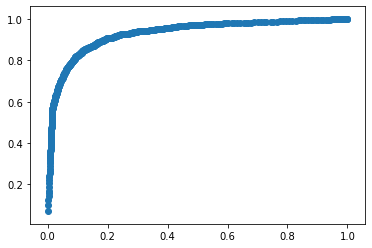

In [206]:
plt.scatter(fpr_list, tpr_list)

In [212]:
validation_pred = best_threshhold[2]
confusion = best_threshhold[3]
confusion

Model Prediction,False,True
LTOT,,
False,1933,265
True,348,1976


## ROC_AUC

In [200]:
validation_pred['LTOT Binary'] = validation_pred['LTOT'].map(lambda x: 1 if x == True else 0 )
validation_pred['RF+LGB'] = (validation_pred['Random Forest']+validation_pred['LGB'])/2
validation_pred['LGB+NN'] = (validation_pred['Neural Net']+validation_pred['LGB'])/2
validation_pred['RF+NN'] = (validation_pred['Neural Net']+validation_pred['Random Forest'])/2
validation_pred

,LGB,Random Forest,Neural Net,Model Average,LTOT,Model Prediction,Check,True Positive,False Positive,True Negative,False Negative,LTOT Binary,RF+LGB,LGB+NN,RF+NN
ID77169186331,0.523266,0.282375,0.875510,0.560384,False,True,False,False,True,False,False,0,0.402821,0.699388,0.578942
ID96285569433,0.250204,0.374280,0.776038,0.466841,True,False,False,False,False,False,True,1,0.312242,0.513121,0.575159
ID8247177027,0.663748,0.666734,0.819076,0.716519,True,True,True,True,False,False,False,1,0.665241,0.741412,0.742905
ID26312489912,0.834495,0.795504,0.898175,0.842724,True,True,True,True,False,False,False,1,0.814999,0.866335,0.846839
ID47705064177,0.020523,0.112777,0.817061,0.316787,False,False,True,False,False,True,False,0,0.066650,0.418792,0.464919
ID85088835463,0.550919,0.633892,0.775847,0.653553,False,True,False,False,True,False,False,0,0.592406,0.663383,0.704870
ID82025131621,0.715751,0.467710,0.816660,0.666707,True,True,True,True,False,False,False,1,0.591730,0.766205,0.642185
ID93293096867,0.756591,0.485380,0.574148,0.605373,True,True,True,True,False,False,False,1,0.620985,0.665370,0.529764
ID18488900930,0.659355,0.605748,0.870411,0.711838,True,True,True,True,False,False,False,1,0.632551,0.764883,0.738079
ID93692445658,0.987690,0.952242,0.993305,0.977746,False,True,False,False,True,False,False,0,0.969966,0.990497,0.972773


In [201]:
from sklearn.metrics import roc_auc_score

print('LGB ROC AUC:', roc_auc_score(validation_pred['LTOT Binary'], validation_pred['LGB']))
print('Random Forest ROC AUC:', roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Random Forest']))
print('Neural Net ROC AUC:', roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Neural Net']), '\n')

print('LGB and Random Forest ROC AUC:', roc_auc_score(validation_pred['LTOT Binary'], validation_pred['RF+LGB']))
print('LGB and Neural Net ROC AUC:', roc_auc_score(validation_pred['LTOT Binary'], validation_pred['LGB+NN']))
print('Random Forest and Neural Net ROC AUC:', roc_auc_score(validation_pred['LTOT Binary'], validation_pred['RF+NN']), '\n')

print('3 Model Average ROC AUC:', roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Model Average']), '\n')

LGB ROC AUC: 0.930925606755633
Random Forest ROC AUC: 0.9148883979959875
Neural Net ROC AUC: 0.7833841866882583 

LGB and Random Forest ROC AUC: 0.9282191485296444
LGB and Neural Net ROC AUC: 0.918098658771313
Random Forest and Neural Net ROC AUC: 0.8994807711281888 

3 Model Average ROC AUC: 0.9204750563413148 

